In [1]:
import cv2
import numpy as np
import urllib.request

def url_to_image(url):
    # Download the image
    resp = urllib.request.urlopen(url)

    # Convert the image to a NumPy array
    image = np.asarray(bytearray(resp.read()), dtype="uint8")

    # Decode the image using OpenCV
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    return image

# Example usage


In [2]:
url = "https://www.udottraffic.utah.gov/map/Cctv/6--1"
img = url_to_image(url)


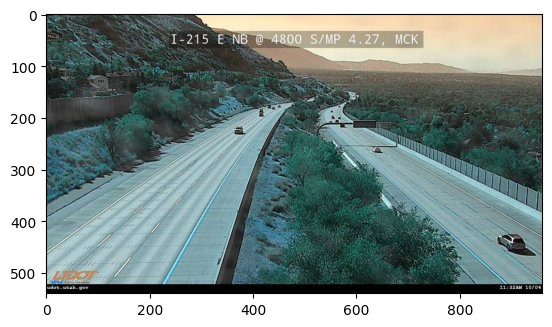

In [3]:
# Display the image
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [4]:
import socket
send_address = ('192.168.0.94', 12345)
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)


In [ ]:
import random
trys = 1000
for i in range(trys):
    url_2_test = random.randint(1, 1000)
    url = "https://www.udottraffic.utah.gov/map/Cctv/"+str(url_2_test)+"--1"  
    #print(i,url)      
    try:
        frame = url_to_image(url)
    except:
       continue
    if frame is None:
        continue
    if frame.shape[0]<416 or frame.shape[1]<416:
        continue
    print(i,frame.shape,url)
    frame_x_c = int(frame.shape[1]/2)
    frame_y_c = int(frame.shape[0]/2)

    img_resized = frame[frame_y_c-208:frame_y_c+208, frame_x_c-208:frame_x_c+208]

    _, encoded_frame = cv2.imencode('.jpeg', img_resized,[cv2.IMWRITE_JPEG_QUALITY, 50])

    _, frame = cv2.imencode('.jpeg', frame)

    sock.sendto(encoded_frame, send_address)



print("DONE!")

5 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/61--1
10 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/167--1
14 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/73--1
15 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/289--1
22 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/88--1
24 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/90--1
25 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/275--1
34 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/115--1
47 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/9--1
48 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/6--1
51 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/13--1
57 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/26--1
60 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/282--1
63 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/119--1
78 (540, 960, 3) https://www.udottraffic.utah.gov/map/Cctv/181--1
79 (540, 960, 3) http